In [1]:
from collections import defaultdict

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cmap = sns.diverging_palette(300, 145, s=100, as_cmap=True)

In [2]:
BLEU_SCORES_PATH = 'scoring/bleu-scores'
SIMPLE_BLEU_SCORES_PATH = 'scoring/simple-bleu-scores'
BLEU_INTERPOLATE_SCORES_PATH = 'scoring/interpolate-bleu-scores'

COMET_SCORES_PATH = 'scoring/comet-scores'
COMET_SIMPLE_SCORES_PATH = 'scoring/simple-comet-scores'
COMET_INTERPOLATE_SCORES_PATH = 'scoring/interpolate-comet-scores'

In [3]:
bleu_scores = defaultdict(dict)
simple_bleu_scores = {}
interpolate_bleu_scores = defaultdict(dict)
with open(BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

with open(SIMPLE_BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model = line[0]
        try:
            score = float(line[1])
            simple_bleu_scores[model] = score
        except Exception as e:
            print(line, e)

with open(BLEU_INTERPOLATE_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            interpolate_bleu_scores[model_one][model_two] = score
            interpolate_bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

['baseline_en-de_8k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_32k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_418M', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['nllb-200-distilled-600M', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '

In [ ]:
comet_scores = defaultdict(dict)
simple_comet_scores = {}
interpolate_comet_scores = defaultdict(dict)
with open(BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

with open(SIMPLE_BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model = line[0]
        try:
            score = float(line[1])
            simple_bleu_scores[model] = score
        except Exception as e:
            print(line, e)

with open(BLEU_INTERPOLATE_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            interpolate_bleu_scores[model_one][model_two] = score
            interpolate_bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

In [4]:
delta_improvement = defaultdict(dict)
for model_one in bleu_scores:
    for model_two in bleu_scores[model_one]:
        delta_improvement[model_one][model_two] = bleu_scores[model_one][model_two] - max(simple_bleu_scores.get(model_one, 0), simple_bleu_scores.get(model_two, 0))

In [5]:
delta_interpolate_improvement = defaultdict(dict)
for model_one in bleu_scores:
    for model_two in bleu_scores[model_one]:
        if model_one in interpolate_bleu_scores and model_two in interpolate_bleu_scores[model_one]:
            # print(model_one, model_two, bleu_scores[model_one][model_two], interpolate_bleu_scores[model_one][model_two])
            delta_interpolate_improvement[model_one][model_two] = bleu_scores[model_one][model_two] - interpolate_bleu_scores[model_one][model_two]
        # else:
        #     delta_interpolate_improvement[model_one][model_two] = 0

In [6]:
interpolate_bleu_scores

defaultdict(dict,
            {'baseline_en-de_8k_ep1': {'baseline_en-de_8k_ep2': 27.5,
              'baseline_en-de_8k_ep3': 28.1,
              'baseline_en-de_8k_ep4': 28.4,
              'baseline_en-de_8k_ep5': 28.6,
              'baseline_en-de_8k_ep10': 28.5,
              'baseline_en-de_8k_ep15': 28.5,
              'baseline_en-de_8k_ep20': 28.8,
              'baseline_en-de_8k_ep25': 28.9},
             'baseline_en-de_8k_ep2': {'baseline_en-de_8k_ep1': 27.5,
              'baseline_en-de_8k_ep3': 28.1,
              'baseline_en-de_8k_ep4': 28.4,
              'baseline_en-de_8k_ep5': 28.6,
              'baseline_en-de_8k_ep10': 28.5,
              'baseline_en-de_8k_ep15': 28.5,
              'baseline_en-de_8k_ep20': 28.8,
              'baseline_en-de_8k_ep25': 28.9},
             'baseline_en-de_8k_ep3': {'baseline_en-de_8k_ep1': 28.1,
              'baseline_en-de_8k_ep2': 28.1,
              'baseline_en-de_8k_ep4': 28.4,
              'baseline_en-de_8k_ep5': 28.

['baseline_en-de_8k_ep1', 'baseline_en-de_8k_ep2', 'baseline_en-de_8k_ep3', 'baseline_en-de_8k_ep4', 'baseline_en-de_8k_ep5', 'baseline_en-de_8k_ep10', 'baseline_en-de_8k_ep15', 'baseline_en-de_8k_ep20', 'baseline_en-de_8k_ep25', 'baseline_en-de_16k_ep1', 'baseline_en-de_16k_ep2', 'baseline_en-de_16k_ep3', 'baseline_en-de_16k_ep4', 'baseline_en-de_16k_ep5', 'baseline_en-de_16k_ep10', 'baseline_en-de_16k_ep15', 'baseline_en-de_16k_ep20', 'baseline_en-de_16k_ep25', 'baseline_en-de_32k_ep1', 'baseline_en-de_32k_ep2', 'baseline_en-de_32k_ep3', 'baseline_en-de_32k_ep4', 'baseline_en-de_32k_ep5', 'baseline_en-de_32k_ep10', 'baseline_en-de_32k_ep15', 'baseline_en-de_32k_ep20', 'baseline_en-de_32k_ep25', 'baseline_en-de_64k_ep1', 'baseline_en-de_64k_ep2', 'baseline_en-de_64k_ep3', 'baseline_en-de_64k_ep4', 'baseline_en-de_64k_ep5', 'baseline_en-de_64k_ep10', 'baseline_en-de_64k_ep15', 'baseline_en-de_64k_ep20', 'baseline_en-de_64k_ep25']


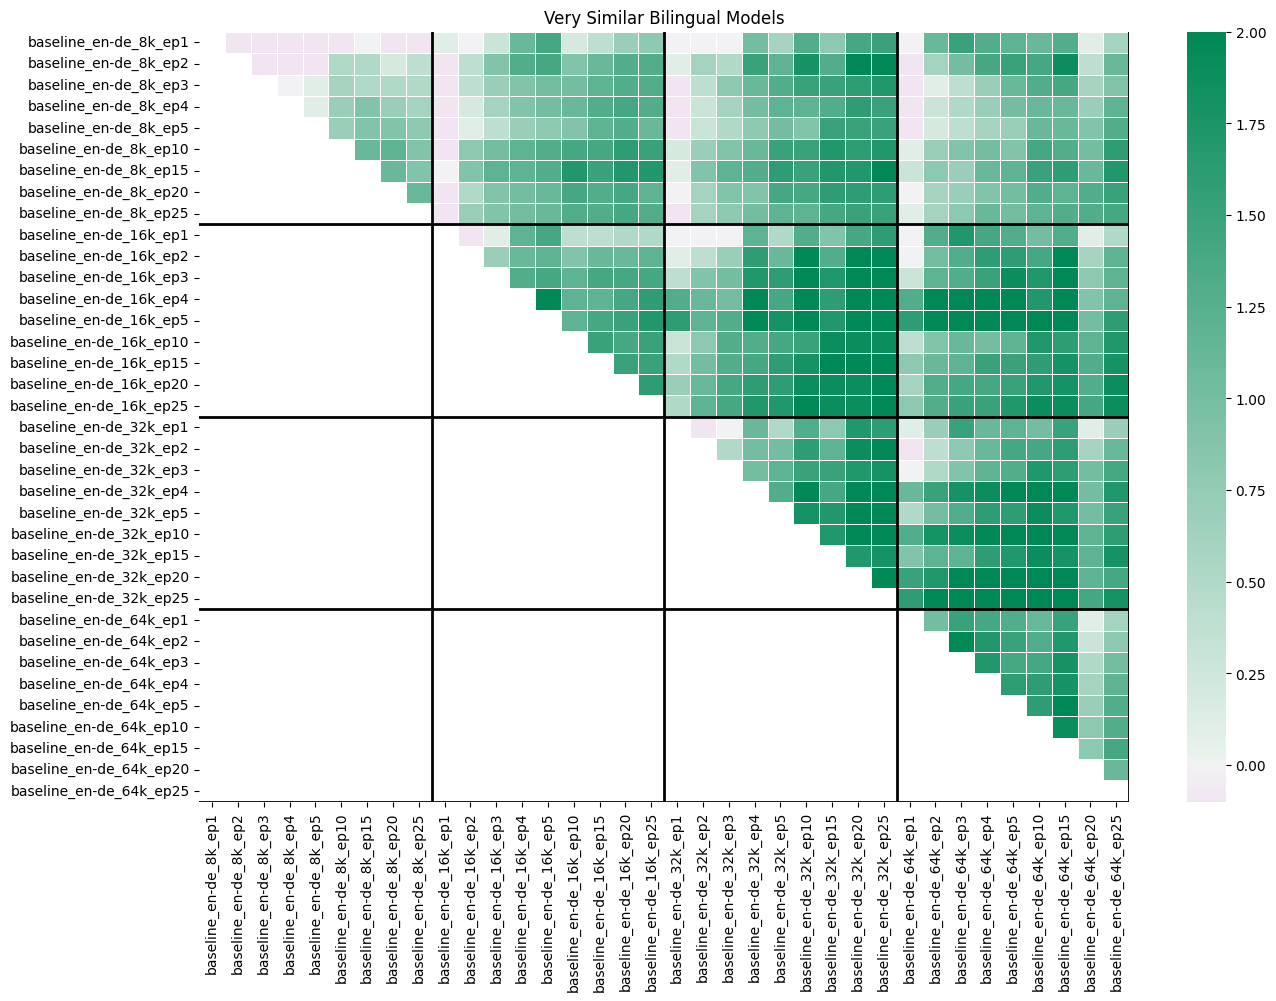

In [22]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.startswith("baseline")]
print(models)
score_matrix = pd.DataFrame(delta_improvement, index=models, columns=models)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=False, 
    fmt=".2f", 
    mask=mask, 
    cmap=sns.diverging_palette(300, 145, s=100, as_cmap=True),  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0.0,  # Ensure zero is yellow, balancing red/green around zero
    vmin=-0.1,
    vmax=2
)

# Draw a triangle around the masked section
lines = [9, 18, 27, 36]
for _ in lines:
    plt.plot([0, len(score_matrix)], [_, _], color='black', linewidth=2)
    plt.plot([_, _], [0, len(score_matrix)], color='black', linewidth=2)

plt.title("Very Similar Bilingual Models")
plt.show()

['baseline_en-de_8k_ep1', 'baseline_en-de_8k_ep2', 'baseline_en-de_8k_ep3', 'baseline_en-de_8k_ep4', 'baseline_en-de_8k_ep5', 'baseline_en-de_8k_ep10', 'baseline_en-de_8k_ep15', 'baseline_en-de_8k_ep20', 'baseline_en-de_8k_ep25', 'baseline_en-de_16k_ep1', 'baseline_en-de_16k_ep2', 'baseline_en-de_16k_ep3', 'baseline_en-de_16k_ep4', 'baseline_en-de_16k_ep5', 'baseline_en-de_16k_ep10', 'baseline_en-de_16k_ep15', 'baseline_en-de_16k_ep20', 'baseline_en-de_16k_ep25', 'baseline_en-de_32k_ep1', 'baseline_en-de_32k_ep2', 'baseline_en-de_32k_ep3', 'baseline_en-de_32k_ep4', 'baseline_en-de_32k_ep5', 'baseline_en-de_32k_ep10', 'baseline_en-de_32k_ep15', 'baseline_en-de_32k_ep20', 'baseline_en-de_32k_ep25', 'baseline_en-de_64k_ep1', 'baseline_en-de_64k_ep2', 'baseline_en-de_64k_ep3', 'baseline_en-de_64k_ep4', 'baseline_en-de_64k_ep5', 'baseline_en-de_64k_ep10', 'baseline_en-de_64k_ep15', 'baseline_en-de_64k_ep20', 'baseline_en-de_64k_ep25']


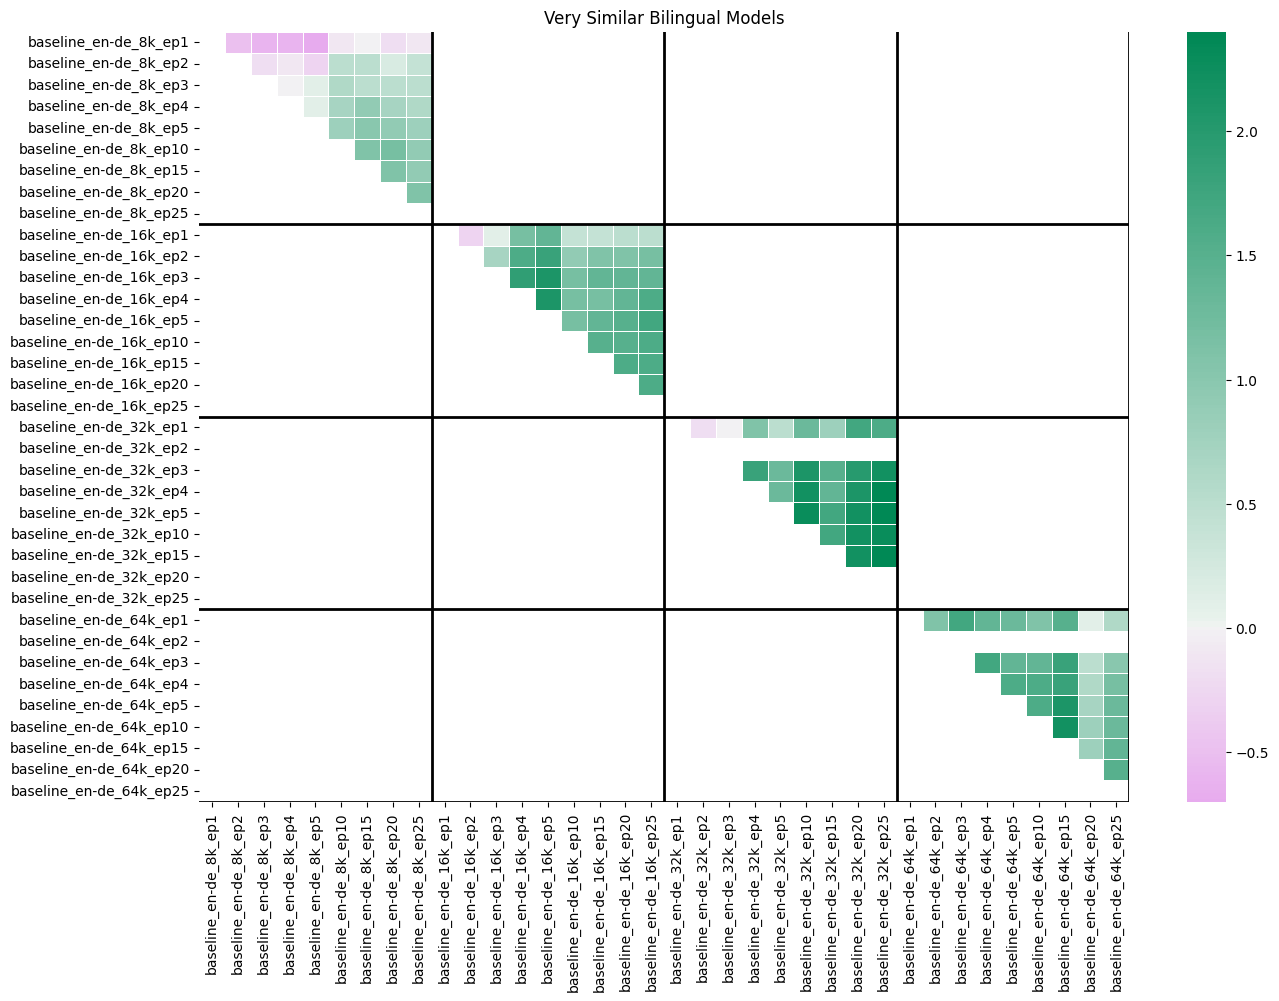

In [23]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_interpolate_improvement.keys() if _.startswith("baseline")]
print(models)
score_matrix = pd.DataFrame(delta_interpolate_improvement, index=models, columns=models)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=False, 
    fmt=".2f", 
    mask=mask, 
    cmap=sns.diverging_palette(300, 145, s=100, as_cmap=True),  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0.0,  # Ensure zero is yellow, balancing red/green around zero
)

# Draw a triangle around the masked section
lines = [9, 18, 27, 36]
for _ in lines:
    plt.plot([0, len(score_matrix)], [_, _], color='black', linewidth=2)
    plt.plot([_, _], [0, len(score_matrix)], color='black', linewidth=2)

plt.title("Very Similar Bilingual Models")
plt.show()

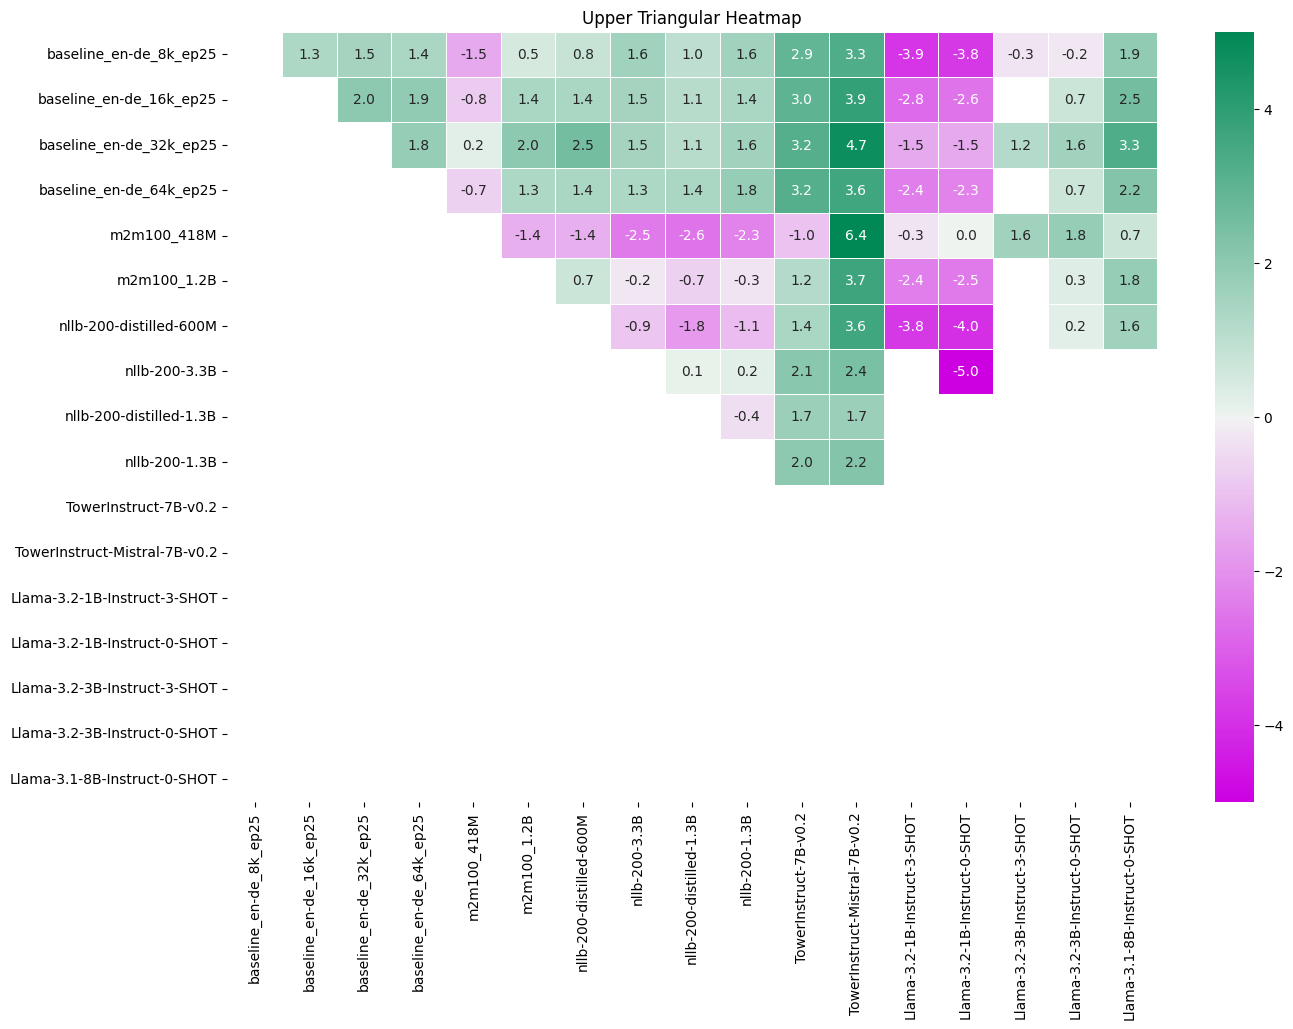

In [10]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.endswith("ep25") or not _.startswith("baseline")]
score_matrix = pd.DataFrame(delta_improvement, index=models, columns=models)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=True, 
    fmt=".1f", 
    mask= mask, 
    cmap=cmap,  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0,  # Ensure zero is yellow, balancing red/green around zero
    vmax=5
)

plt.title("Upper Triangular Heatmap")
plt.show()

In [11]:
model_one_output = "Dies ist ein Test"
model_two_output = "Dies ist eine Prufang"
ensemble_output = "Dies ist eine Test" #<--best

model_one_likelihood(model_one_output) ? model_one_likelihood(model_two_output) > model_one_likelihood(ensemble_output)
model_two_likelihood(model_two_output) ? model_two_likelihood(model_one_output) > model_two_likelihood(ensemble_output)



SyntaxError: invalid syntax (2993154762.py, line 5)